## 목차
- [1. 경진대회 이해](#1-경진대회-이해)
- [2. 탐색적 데이터 분석](#2-탐색적-데이터-분석)
  * [2.1. 데이터 둘러보기](#21-데이터-둘러보기)
  * [2.2. 데이터 시각화](#22-데이터-시각화)
- [3. 베이스라인 모델](#3-베이스라인-모델)
  * [3.1. 피쳐 엔지니어링 1:피쳐명 한글화](#31-피쳐-엔지니어링-1피쳐명-한글화)
  * [3.2. 피쳐 엔지니어링 2:데이터 다운캐스팅](#32-피쳐-엔지니어링-2데이터-다운캐스팅)
  * [3.3. 피쳐 엔지니어링 3:데이터 조합 생성](#33-피쳐-엔지니어링-3데이터-조합-생성)
  * [3.4. 피쳐 엔지니어링 4:타깃값(월간 판매량)추가](#34-피쳐-엔지니어링-4타깃값월간-판매량추가)
  * [3.5. 피쳐 엔지니어링 5:테스트 데이터 이어붙이기](#35-피쳐-엔지니어링-5테스트-데이터-이어붙이기)
  * [3.6. 피쳐 엔지니어링 6:나머지 데이터 병합(최종 데이터 생성)](#36-피쳐-엔지니어링-6나머지-데이터-병합최종-데이터-생성)
  * [3.7. 피쳐 엔지니어링 7:마무리](#37-피쳐-엔지니어링-7마무리)
  * [3.8. 모델 훈련 및 성능 검증](#38-모델-훈련-및-성능-검증)
  * [3.9. 예측 및 결과 제출](#39-예측-및-결과-제출)
- [4. 성능 개선](#4-성능-개선)
  * [4.1. 피쳐 엔지니어링 1:피쳐명 한글화와 데이터 다운캐스팅](#41-피쳐-엔지니어링-1피쳐명-한글화와-데이터-다운캐스팅)
  * [4.2. 피쳐 엔지니어링 2:개별 데이터 피쳐 엔지니어링](#42-피쳐-엔지니어링-2개별-데이터-피쳐-엔지니어링)
  * [4.3. 피쳐 엔지니어링 3:데이터 조합 및 파생 피쳐 생성](#43-피쳐-엔지니어링-3데이터-조합-및-파생-피쳐-생성)
  * [4.4. 피쳐 엔지니어링 4:데이터 합치기](#44-피쳐-엔지니어링-4데이터-합치기)
  * [4.5. 피쳐 엔지니어링 5:시차 피쳐 생성](#45-피쳐-엔지니어링-5시차-피쳐-생성)
  * [4.6. 피쳐 엔지니어링 6:기타 피쳐 엔지니어링](#46-피쳐-엔지니어링-6기타-피쳐-엔지니어링)
  * [4.7. 피쳐 엔지니어링 7:마무리](#47-피쳐-엔지니어링-7마무리)
  * [4.8. 모델 훈련 및 성능 검증](#48-모델-훈련-및-성능-검증)
  * [4.9. 예측 및 결과 제출](#49-예측-및-결과-제출)
- [5. 머신러닝 경진대회를 마치며](#5-머신러닝-경진대회를-마치며)
  * [5.1. 학습 마무리](#51-학습-마무리)
  * [5.2. 핵심 요약](#52-핵심-요약)

<a name="1-경진대회-이해"></a>
# 1. 경진대회 이해

<a name="2-탐색적-데이터-분석"></a>
# 2. 탐색적 데이터 분석

<a name="21-데이터-둘러보기"></a>
## 2.1. 데이터 둘러보기

In [2]:
import pandas as pd

data_path = './dataset/competitive-data-science-predict-future-sales/'

sales_train = pd.read_csv(data_path+'sales_train.csv')
shops = pd.read_csv(data_path+'shops.csv')
items = pd.read_csv(data_path+'items.csv')
item_categories = pd.read_csv(data_path+'item_categories.csv')
test = pd.read_csv(data_path+'test.csv')
submission = pd.read_csv(data_path+'sample_submission.csv')

In [3]:
item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


.info()를 활용하여 결측여부 확인하는법

In [4]:
sales_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            2935849 non-null  object 
 1   date_block_num  2935849 non-null  int64  
 2   shop_id         2935849 non-null  int64  
 3   item_id         2935849 non-null  int64  
 4   item_price      2935849 non-null  float64
 5   item_cnt_day    2935849 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [5]:
train = sales_train.merge(shops, on='shop_id', how='left')
train = train.merge(items, on='item_id', how='left')
train = train.merge(item_categories, on='item_category_id', how='left')

train.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.0,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил


In [6]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    
    return summary

resumetable(train)

데이터 세트 형상: (2935849, 10)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값
0,date,object,0,1034,02.01.2013,03.01.2013
1,date_block_num,int64,0,34,0,0
2,shop_id,int64,0,60,59,25
3,item_id,int64,0,21807,22154,2552
4,item_price,float64,0,19993,999.0,899.0
5,item_cnt_day,float64,0,198,1.0,1.0
6,shop_name,object,0,60,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум"""
7,item_name,object,0,21807,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP
8,item_category_id,int64,0,84,37,58
9,item_category_name,object,0,84,Кино - Blu-Ray,Музыка - Винил


<a name="22-데이터-시각화"></a>
## 2.2. 데이터 시각화

c:\Users\rhdud\.virtualenvs\gitstudy-nbP17xL6\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='item_cnt_day'>

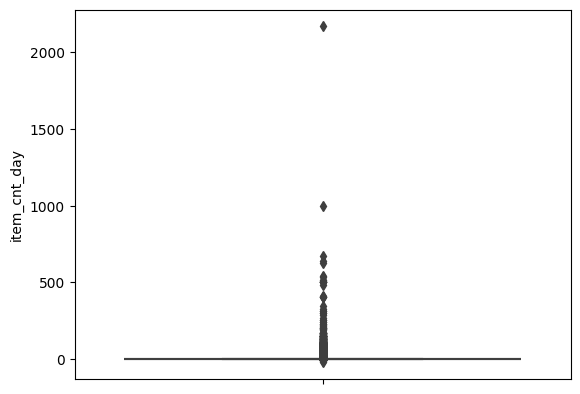

In [7]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(y='item_cnt_day', data=train)

c:\Users\rhdud\.virtualenvs\gitstudy-nbP17xL6\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='item_price'>

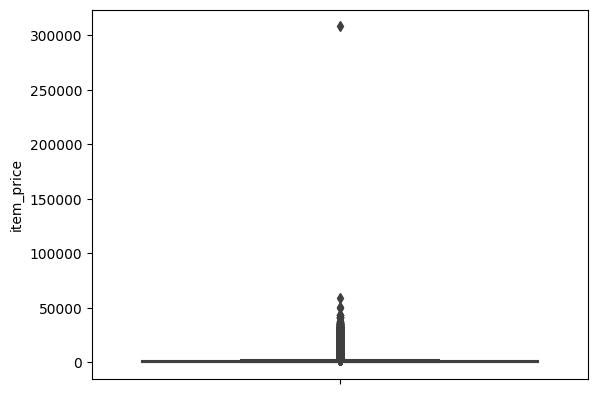

In [8]:

sns.boxplot(y='item_price', data=train)

In [19]:
import numpy as np

group = train.groupby('date_block_num').agg(item_cnt_day_sum=('item_cnt_day', lambda x: np.sum(x)))
group.reset_index().head(3) # 인덱스 재설정

,date_block_num,item_cnt_day_sum
0,0,131479.0
1,1,128090.0
2,2,147142.0


c:\Users\rhdud\.virtualenvs\gitstudy-nbP17xL6\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rhdud\.virtualenvs\gitstudy-nbP17xL6\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rhdud\.virtualenvs\gitstudy-nbP17xL6\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, 'Distribution of monthly item counts by date block number'),
 Text(0.5, 0, 'Date block number'),
 Text(0, 0.5, 'Monthly item counts')]

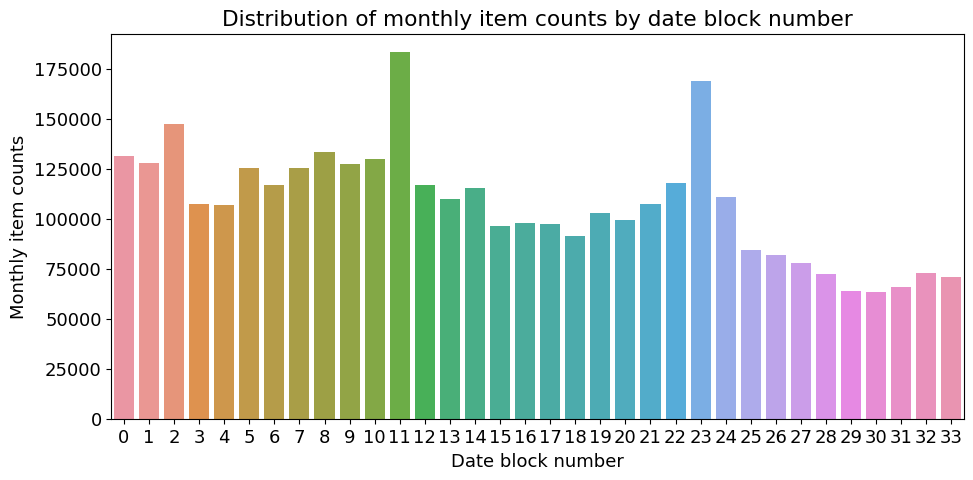

In [21]:
mpl.rc('font', size=13)
figure, ax = plt.subplots() 
figure.set_size_inches(11, 5)

# 월별 총 상품 판매량
group_month_sum = train.groupby('date_block_num').agg(item_cnt_day_sum=('item_cnt_day', lambda x: np.sum(x)))
group_month_sum = group_month_sum.reset_index()

# 월별 총 상품 판매량 막대그래프
sns.barplot(x='date_block_num', y='item_cnt_day_sum', data=group_month_sum)
# 그래프 제목, x축 라벨, y축 라벨명 설정
ax.set(title='Distribution of monthly item counts by date block number',
       xlabel='Date block number', 
       ylabel='Monthly item counts')

c:\Users\rhdud\.virtualenvs\gitstudy-nbP17xL6\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rhdud\.virtualenvs\gitstudy-nbP17xL6\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rhdud\.virtualenvs\gitstudy-nbP17xL6\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


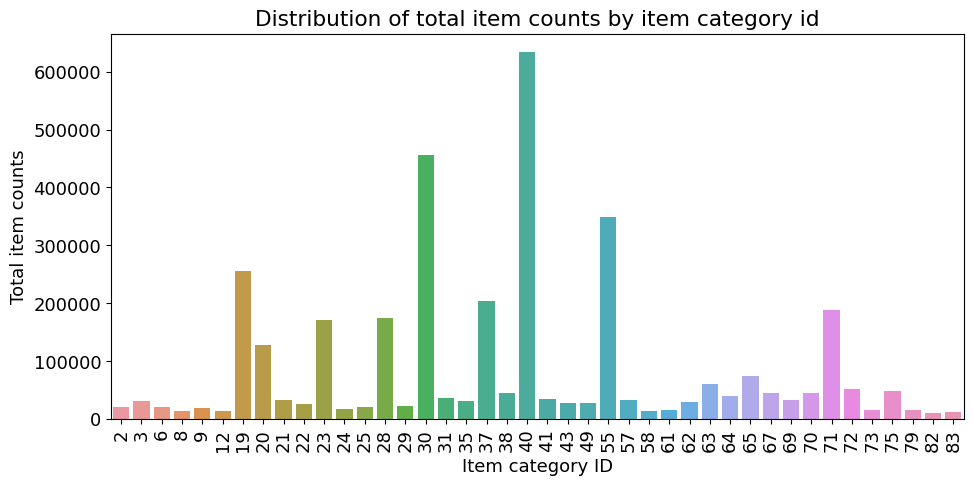

In [23]:
figure, ax= plt.subplots() 
figure.set_size_inches(11, 5)

# 상품분류별 총 상품 판매량
group_cat_sum = train.groupby('item_category_id').agg(item_cnt_day_sum=('item_cnt_day', lambda x: np.sum(x)))
group_cat_sum = group_cat_sum.reset_index()

# 총 판매량이 10,000개를 초과하는 상품분류만 추출
group_cat_sum = group_cat_sum[group_cat_sum['item_cnt_day_sum'] > 10000]

# 상품분류별 총 상품 판매량 막대그래프
sns.barplot(x='item_category_id', y='item_cnt_day_sum', data=group_cat_sum)
ax.set(title='Distribution of total item counts by item category id',
       xlabel='Item category ID', 
       ylabel='Total item counts')
ax.tick_params(axis='x', labelrotation=90) # x축 라벨 회전

c:\Users\rhdud\.virtualenvs\gitstudy-nbP17xL6\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rhdud\.virtualenvs\gitstudy-nbP17xL6\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rhdud\.virtualenvs\gitstudy-nbP17xL6\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


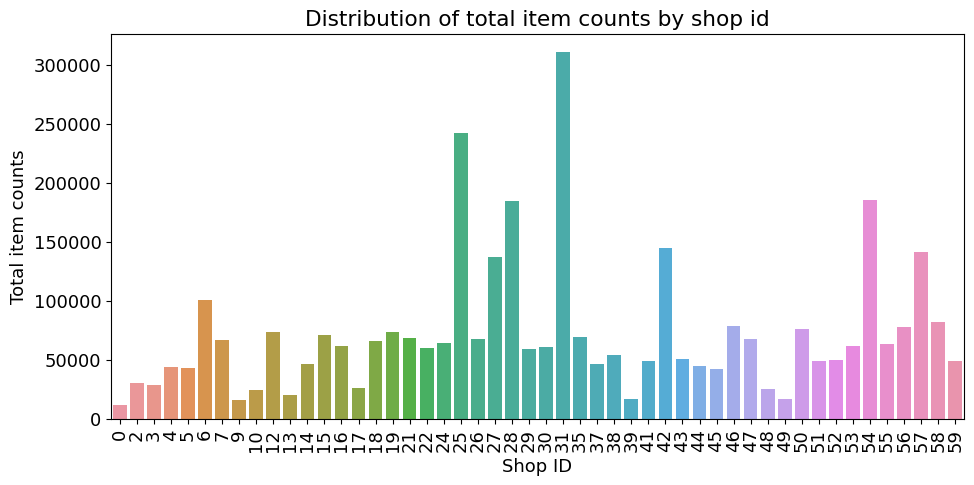

In [24]:
figure, ax= plt.subplots() 
figure.set_size_inches(11, 5)

# 상점별 총 상품 판매량
group_shop_sum = train.groupby('shop_id').agg(item_cnt_day_sum=('item_cnt_day', lambda x: np.sum(x)))
group_shop_sum = group_shop_sum.reset_index()

group_shop_sum = group_shop_sum[group_shop_sum['item_cnt_day_sum'] > 10000]

# 상점별 총 상품 판매량 막대그래프
sns.barplot(x='shop_id', y='item_cnt_day_sum', data=group_shop_sum)
ax.set(title='Distribution of total item counts by shop id',
       xlabel='Shop ID', 
       ylabel='Total item counts')
ax.tick_params(axis='x', labelrotation=90)

<a name="3-베이스라인-모델"></a>
# 3. 베이스라인 모델

In [20]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings(action='ignore')

data_path = './dataset/competitive-data-science-predict-future-sales/'

sales_train = pd.read_csv(data_path+'sales_train.csv')
shops = pd.read_csv(data_path+'shops.csv')
items = pd.read_csv(data_path+'items.csv')
item_categories = pd.read_csv(data_path+'item_categories.csv')
test = pd.read_csv(data_path+'test.csv')
submission = pd.read_csv(data_path+'sample_submission.csv')

<a name="31-피쳐-엔지니어링-1피쳐명-한글화"></a>
## 3.1. 피쳐 엔지니어링 1:피쳐명 한글화

In [21]:
sales_train = sales_train.rename(columns={'date': '날짜', 
                                          'date_block_num': '월ID',
                                          'shop_id': '상점ID',
                                          'item_id': '상품ID',
                                          'item_price': '판매가',
                                          'item_cnt_day': '판매량'})

sales_train.head(2)

,날짜,월ID,상점ID,상품ID,판매가,판매량
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0


In [22]:
shops = shops.rename(columns={'shop_name': '상점명',
                              'shop_id': '상점ID'})

shops.head(2)

,상점명,상점ID
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1


In [23]:
items = items.rename(columns={'item_name': '상품명',
                              'item_id': '상품ID',
                              'item_category_id': '상품분류ID'})

items.head(2)

,상품명,상품ID,상품분류ID
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76


In [24]:
item_categories = item_categories.rename(columns=
                                         {'item_category_name': '상품분류명',
                                          'item_category_id': '상품분류ID'})

item_categories.head(2)

,상품분류명,상품분류ID
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1


In [25]:
test = test.rename(columns={'shop_id': '상점ID',
                            'item_id': '상품ID'})

test.head(2)

,ID,상점ID,상품ID
0,0,5,5037
1,1,5,5320


<a name="32-피쳐-엔지니어링-2데이터-다운캐스팅"></a>
## 3.2. 피쳐 엔지니어링 2:데이터 다운캐스팅

In [26]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('{:.1f}% 압축됨'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [27]:
all_df = [sales_train, shops, items, item_categories, test]
for df in all_df:
    df = downcast(df)

54.2% 압축됨
38.6% 압축됨
54.2% 압축됨
39.9% 압축됨
70.8% 압축됨


<a name="33-피쳐-엔지니어링-3데이터-조합-생성"></a>
## 3.3. 피쳐 엔지니어링 3:데이터 조합 생성

In [28]:
from itertools import product

train = []
# 월ID, 상점ID, 상품ID 조합 생성 
for i in sales_train['월ID'].unique():
    all_shop = sales_train.loc[sales_train['월ID']==i, '상점ID'].unique()
    all_item = sales_train.loc[sales_train['월ID']==i, '상품ID'].unique()
    train.append(np.array(list(product([i], all_shop, all_item))))

idx_features = ['월ID', '상점ID', '상품ID'] # 기준 피처
# 리스트 타입인 train을 DataFrame 타입으로 변환 
train = pd.DataFrame(np.vstack(train), columns=idx_features)

train

,월ID,상점ID,상품ID
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564
...,...,...,...
10913845,33,21,7635
10913846,33,21,7638
10913847,33,21,7640
10913848,33,21,7632


<a name="34-피쳐-엔지니어링-4타깃값월간-판매량추가"></a>
## 3.4. 피쳐 엔지니어링 4:타깃값(월간 판매량)추가

In [29]:
# idx_features를 기준으로 그룹화해 판매량 합 구하기 
group = sales_train.groupby(idx_features).agg({'판매량': 'sum'})
# 인덱스 재설정
group = group.reset_index()
# 피처명을 '판매량'에서 '월간 판매량'으로 변경
group = group.rename(columns={'판매량': '월간 판매량'})

group

,월ID,상점ID,상품ID,월간 판매량
0,0,0,32,6
1,0,0,33,3
2,0,0,35,1
3,0,0,43,1
4,0,0,51,2
...,...,...,...,...
1609119,33,59,22087,6
1609120,33,59,22088,2
1609121,33,59,22091,1
1609122,33,59,22100,1


In [30]:
train = train.merge(group, on=idx_features, how='left')

train.fillna(0)

,월ID,상점ID,상품ID,월간 판매량
0,0,59,22154,1.0
1,0,59,2552,0.0
2,0,59,2554,0.0
3,0,59,2555,0.0
4,0,59,2564,0.0
...,...,...,...,...
10913845,33,21,7635,0.0
10913846,33,21,7638,0.0
10913847,33,21,7640,0.0
10913848,33,21,7632,0.0


In [31]:
import gc

<a name="35-피쳐-엔지니어링-5테스트-데이터-이어붙이기"></a>
## 3.5. 피쳐 엔지니어링 5:테스트 데이터 이어붙이기

In [32]:
test['월ID'] = 34

In [33]:
# train과 test 이어붙이기
all_data = pd.concat([train, test.drop('ID', axis=1)],
                     ignore_index=True, # 기존 인덱스 무시(0부터 새로 시작)
                     keys=idx_features) # 이어붙이는 기준이 되는 피처

In [34]:
all_data = all_data.fillna(0)

all_data

,월ID,상점ID,상품ID,월간 판매량
0,0,59,22154,1.0
1,0,59,2552,0.0
2,0,59,2554,0.0
3,0,59,2555,0.0
4,0,59,2564,0.0
...,...,...,...,...
11128045,34,45,18454,0.0
11128046,34,45,16188,0.0
11128047,34,45,15757,0.0
11128048,34,45,19648,0.0


<a name="36-피쳐-엔지니어링-6나머지-데이터-병합최종-데이터-생성"></a>
## 3.6. 피쳐 엔지니어링 6:나머지 데이터 병합(최종 데이터 생성)

In [35]:
# 나머지 데이터 병합
all_data = all_data.merge(shops, on='상점ID', how='left')
all_data = all_data.merge(items, on='상품ID', how='left')
all_data = all_data.merge(item_categories, on='상품분류ID', how='left')

# 데이터 다운캐스팅
all_data = downcast(all_data)

# 가비지 컬렉션
del shops, items, item_categories
gc.collect()

31.1% 압축됨


8

In [37]:
all_data = all_data.drop(['상점명', '상품명', '상품분류명'], axis=1)

In [39]:
all_data

,월ID,상점ID,상품ID,월간 판매량,상품분류ID
0,0,59,22154,1,37
1,0,59,2552,0,58
2,0,59,2554,0,58
3,0,59,2555,0,56
4,0,59,2564,0,59
...,...,...,...,...,...
11128045,34,45,18454,0,55
11128046,34,45,16188,0,64
11128047,34,45,15757,0,55
11128048,34,45,19648,0,40


<a name="37-피쳐-엔지니어링-7마무리"></a>
## 3.7. 피쳐 엔지니어링 7:마무리

In [42]:
# 훈련 데이터 (피처)
X_train = all_data[all_data['월ID'] < 33]
X_train = X_train.drop(['월간 판매량'], axis=1)
# 검증 데이터 (피처)
X_valid = all_data[all_data['월ID'] == 33]
X_valid = X_valid.drop(['월간 판매량'], axis=1)
# 테스트 데이터 (피처)
X_test = all_data[all_data['월ID'] == 34]
X_test = X_test.drop(['월간 판매량'], axis=1)

# 훈련 데이터 (타깃값)
y_train = all_data[all_data['월ID'] < 33]['월간 판매량']
y_train = y_train.clip(0, 20) # 타깃값을 0 ~ 20로 제한
# 검증 데이터 (타깃값)
y_valid = all_data[all_data['월ID'] == 33]['월간 판매량']
y_valid = y_valid.clip(0, 20)

<a name="38-모델-훈련-및-성능-검증"></a>
## 3.8. 모델 훈련 및 성능 검증

In [53]:
from lightgbm.sklearn import LGBMRegressor

# LightGBM 하이퍼파라미터
params = {'metric': 'rmse', # 평가지표 = rmse
          'num_leaves': 255,
          'learning_rate': 0.01,
          'force_col_wise': True,
          'early_stopping_round': 50,
          'valid' : (X_valid, y_valid),
          'random_state': 42}

# 범주형 피처 설정
cat_features = ['상점ID', '상품분류ID']

# LightGBM 훈련 및 검증 데이터셋
# dtrain = lgb.Dataset(X_train, y_train)
# dvalid = lgb.Dataset(X_valid, y_valid)
model = LGBMRegressor(
    n_estimators = 500,
    **params
)

evals = [(X_valid, y_valid)]

model.fit(X_train, y_train,
          categorical_feature = cat_features,
          eval_set=evals
          )

[LightGBM] [Warning] 10913845 is set=, 10913845= will be ignored. Current value: 10913845=
[LightGBM] [Warning] 10675679 is set=, 10675679= will be ignored. Current value: 10675679=
[LightGBM] [Warning] 10675681 is set=, 10675681= will be ignored. Current value: 10675681=
[LightGBM] [Warning] 10913849 is set=, 10913849= will be ignored. Current value: 10913849=
[LightGBM] [Warning] 10913848 is set=, 10913848= will be ignored. Current value: 10913848=
[LightGBM] [Warning] 33 is set=, 33= will be ignored. Current value: 33=
[LightGBM] [Warning] 33 is set=, 33= will be ignored. Current value: 33=
[LightGBM] [Warning] 33 is set=, 33= will be ignored. Current value: 33=
[LightGBM] [Warning] 33 is set=, 33= will be ignored. Current value: 33=
[LightGBM] [Warning] 33 is set=, 33= will be ignored. Current value: 33=
[LightGBM] [Warning] 33 is set=, 33= will be ignored. Current value: 33=
[LightGBM] [Warning] 33 is set=, 33= will be ignored. Current value: 33=
[LightGBM] [Warning] 33 is set=, 3

LGBMRegressor(early_stopping_round=50, force_col_wise=True, learning_rate=0.01,
              metric='rmse', n_estimators=500, num_leaves=255, random_state=42,
              valid=(          월ID  상점ID   상품ID  상품분류ID
10675678   33    45  13315      47
10675679   33    45  13880      55
10675680   33    45  13881      55
10675681   33    45  13923      40
10675682   33    45  14227      30
...       ...   ...    ...     ...
10913845   33    21   7635      64
10913846   33    21   7638      64
10913847   33    21   7640      64
10913848   33    21   7632      64
10913849   33    21   7440      57

[238172 rows x 4 columns],
                     10675678    1
10675679    1
10675680    2
10675681    1
10675682    1
           ..
10913845    0
10913846    0
10913847    0
10913848    0
10913849    0
Name: 월간 판매량, Length: 238172, dtype: int16))

<a name="39-예측-및-결과-제출"></a>
## 3.9. 예측 및 결과 제출

<a name="4-성능-개선"></a>
# 4. 성능 개선

In [54]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings(action='ignore')

data_path = './dataset/competitive-data-science-predict-future-sales/'

sales_train = pd.read_csv(data_path+'sales_train.csv')
shops = pd.read_csv(data_path+'shops.csv')
items = pd.read_csv(data_path+'items.csv')
item_categories = pd.read_csv(data_path+'item_categories.csv')
test = pd.read_csv(data_path+'test.csv')
submission = pd.read_csv(data_path+'sample_submission.csv')

<a name="41-피쳐-엔지니어링-1피쳐명-한글화와-데이터-다운캐스팅"></a>
## 4.1. 피쳐 엔지니어링 1:피쳐명 한글화와 데이터 다운캐스팅

In [55]:
sales_train = sales_train.rename(columns={'date': '날짜', 
                                          'date_block_num': '월ID',
                                          'shop_id': '상점ID',
                                          'item_id': '상품ID',
                                          'item_price': '판매가',
                                          'item_cnt_day': '판매량'})

shops = shops.rename(columns={'shop_name': '상점명',
                              'shop_id': '상점ID'})

items = items.rename(columns={'item_name': '상품명',
                              'item_id': '상품ID',
                              'item_category_id': '상품분류ID'})

item_categories = item_categories.rename(columns=
                                         {'item_category_name': '상품분류명',
                                          'item_category_id': '상품분류ID'})

test = test.rename(columns={'shop_id': '상점ID',
                            'item_id': '상품ID'})

In [56]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('{:.1f}% 압축됨'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

all_df = [sales_train, shops, items, item_categories, test]
for df in all_df:
    df = downcast(df)

54.2% 압축됨
38.6% 압축됨
54.2% 압축됨
39.9% 압축됨
70.8% 압축됨


<a name="42-피쳐-엔지니어링-2개별-데이터-피쳐-엔지니어링"></a>
## 4.2. 피쳐 엔지니어링 2:개별 데이터 피쳐 엔지니어링

In [57]:
# 판매가가 0보다 큰 데이터 추출
sales_train = sales_train[sales_train['판매가'] > 0]
# 판매가가 50,000보다 작은 데이터 추출
sales_train = sales_train[sales_train['판매가'] < 50000]

# 판매량이 0보다 큰 데이터 추출
sales_train = sales_train[sales_train['판매량'] > 0]
# 판매량이 1,000보다 작은 데이터 추출
sales_train = sales_train[sales_train['판매량'] < 1000]

In [58]:
print(shops['상점명'][0], '||', shops['상점명'][57])
print(shops['상점명'][1], '||', shops['상점명'][58])
print(shops['상점명'][10], '||', shops['상점명'][11])
print(shops['상점명'][39], '||', shops['상점명'][40])

!Якутск Орджоникидзе, 56 фран || Якутск Орджоникидзе, 56
!Якутск ТЦ "Центральный" фран || Якутск ТЦ "Центральный"
Жуковский ул. Чкалова 39м? || Жуковский ул. Чкалова 39м²
РостовНаДону ТРК "Мегацентр Горизонт" || РостовНаДону ТРК "Мегацентр Горизонт" Островной


**loc 쓰는 법**

In [59]:
# sales_train 데이터에서 상점ID 수정
sales_train.loc[sales_train['상점ID'] == 0, '상점ID'] = 57
sales_train.loc[sales_train['상점ID'] == 1, '상점ID'] = 58
sales_train.loc[sales_train['상점ID'] == 10, '상점ID'] = 11
sales_train.loc[sales_train['상점ID'] == 39, '상점ID'] = 40

# test 데이터에서 상점ID 수정
test.loc[test['상점ID'] == 0, '상점ID'] = 57
test.loc[test['상점ID'] == 1, '상점ID'] = 58
test.loc[test['상점ID'] == 10, '상점ID'] = 11
test.loc[test['상점ID'] == 39, '상점ID'] = 40

In [66]:
shops['도시'] = shops['상점명'].apply(lambda x: x.split()[0])

In [67]:
shops['도시'].unique()

array(['!Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
       'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
       'Якутск', 'Ярославль'], dtype=object)

In [68]:
shops.loc[shops['도시'] =='!Якутск', '도시'] = 'Якутск'

In [69]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더 생성
label_encoder = LabelEncoder()
# 도시 피처 레이블 인코딩
shops['도시'] = label_encoder.fit_transform(shops['도시'])

In [70]:
# 상점명 피처 제거
shops = shops.drop('상점명', axis=1)

shops.head()

,상점ID,도시
0,0,29
1,1,29
2,2,0
3,3,1
4,4,2


In [72]:
# 상품명 피처 제거
items = items.drop(['상품명'], axis=1)

In [73]:
# 상품이 맨 처음 팔린 날을 피처로 추가
items['첫 판매월'] = sales_train.groupby('상품ID').agg({'월ID': 'min'})['월ID']

items.head()

,상품ID,상품분류ID,첫 판매월
0,0,40,20.0
1,1,76,15.0
2,2,40,19.0
3,3,40,18.0
4,4,40,20.0


In [75]:
items[items['첫 판매월'].isna()]

,상품ID,상품분류ID,첫 판매월
83,83,40,NaN
140,140,45,NaN
168,168,44,NaN
173,173,45,NaN
204,204,44,NaN
...,...,...,...
21974,21974,61,NaN
21975,21975,61,NaN
22022,22022,40,NaN
22035,22035,40,NaN


In [76]:
# 첫 판매월 피처의 결측값을 34로 대체
items['첫 판매월'] = items['첫 판매월'].fillna(34)

In [77]:
# 상품분류명의 첫 단어를 대분류로 추출
item_categories['대분류'] = item_categories['상품분류명'].apply(lambda x: x.split()[0])  

In [78]:
item_categories['대분류'].value_counts()

대분류
Игры          14
Книги         13
Подарки       12
Игровые        8
Аксессуары     7
Музыка         6
Программы      6
Карты          5
Кино           5
Служебные      2
Чистые         2
PC             1
Билеты         1
Доставка       1
Элементы       1
Name: count, dtype: int64

In [79]:
def make_etc(x):
    if len(item_categories[item_categories['대분류']==x]) >= 5:
        return x
    else:
        return 'etc'

# 대분류의 고윳값 개수가 5개 미만이면 'etc'로 바꾸기
item_categories['대분류'] = item_categories['대분류'].apply(make_etc)

In [80]:
# 레이블 인코더 생성
label_encoder = LabelEncoder()

# 대분류 피처 레이블 인코딩
item_categories['대분류'] = label_encoder.fit_transform(item_categories['대분류'])

# 상품분류명 피처 제거
item_categories = item_categories.drop('상품분류명', axis=1)

<a name="43-피쳐-엔지니어링-3데이터-조합-및-파생-피쳐-생성"></a>
## 4.3. 피쳐 엔지니어링 3:데이터 조합 및 파생 피쳐 생성

In [81]:
from itertools import product

train = []
# 월ID, 상점ID, 상품ID 조합 생성
for i in sales_train['월ID'].unique():
    all_shop = sales_train.loc[sales_train['월ID']==i, '상점ID'].unique()
    all_item = sales_train.loc[sales_train['월ID']==i, '상품ID'].unique()
    train.append(np.array(list(product([i], all_shop, all_item))))

idx_features = ['월ID', '상점ID', '상품ID'] # 기준 피처
train = pd.DataFrame(np.vstack(train), columns=idx_features)

In [82]:
group = sales_train.groupby(idx_features).agg({'판매량': 'sum',
                                               '판매가': 'mean'})
group = group.reset_index()
group = group.rename(columns={'판매량': '월간 판매량', '판매가': '평균 판매가'})

train = train.merge(group, on=idx_features, how='left')

train.head()

,월ID,상점ID,상품ID,월간 판매량,평균 판매가
0,0,59,22154,1.0,999.0
1,0,59,2552,NaN,NaN
2,0,59,2554,NaN,NaN
3,0,59,2555,NaN,NaN
4,0,59,2564,NaN,NaN


In [83]:
import gc

# group 변수 가비지 컬렉션
del group
gc.collect()

In [84]:
# 상품 판매건수 피처 추가
group = sales_train.groupby(idx_features).agg({'판매량': 'count'})
group = group.reset_index()
group = group.rename(columns={'판매량': '판매건수'})

train = train.merge(group, on=idx_features, how='left')

# 가비지 컬렉션
del group, sales_train
gc.collect()

train.head()

,월ID,상점ID,상품ID,월간 판매량,평균 판매가,판매건수
0,0,59,22154,1.0,999.0,1.0
1,0,59,2552,NaN,NaN,NaN
2,0,59,2554,NaN,NaN,NaN
3,0,59,2555,NaN,NaN,NaN
4,0,59,2564,NaN,NaN,NaN


<a name="44-피쳐-엔지니어링-4데이터-합치기"></a>
## 4.4. 피쳐 엔지니어링 4:데이터 합치기

In [85]:
# 테스트 데이터 월ID를 34로 설정
test['월ID'] = 34

# train과 test 이어붙이기
all_data = pd.concat([train, test.drop('ID', axis=1)],
                     ignore_index=True,
                     keys=idx_features)
# 결측값을 0으로 대체
all_data = all_data.fillna(0)

all_data.head()

,월ID,상점ID,상품ID,월간 판매량,평균 판매가,판매건수
0,0,59,22154,1.0,999.0,1.0
1,0,59,2552,0.0,0.0,0.0
2,0,59,2554,0.0,0.0,0.0
3,0,59,2555,0.0,0.0,0.0
4,0,59,2564,0.0,0.0,0.0


In [86]:
# 나머지 데이터 병합
all_data = all_data.merge(shops, on='상점ID', how='left')
all_data = all_data.merge(items, on='상품ID', how='left')
all_data = all_data.merge(item_categories, on='상품분류ID', how='left')

# 데이터 다운캐스팅
all_data = downcast(all_data)

64.2% 압축됨


In [87]:
del shops, items, item_categories
gc.collect()

0

<a name="45-피쳐-엔지니어링-5시차-피쳐-생성"></a>
## 4.5. 피쳐 엔지니어링 5:시차 피쳐 생성

In [88]:
def add_mean_features(df, mean_features, idx_features):
    # 기준 피처 확인 
    assert (idx_features[0] == '월ID') and \
           len(idx_features) in [2, 3]
    
    # 파생 피처명 설정 
    if len(idx_features) == 2:
        feature_name = idx_features[1] + '별 평균 판매량'
    else:
        feature_name = idx_features[1] + ' ' + idx_features[2] + '별 평균 판매량'
    
    # 기준 피처를 토대로 그룹화해 월간 평균 판매량 구하기 
    group = df.groupby(idx_features).agg({'월간 판매량': 'mean'})
    group = group.reset_index()
    group = group.rename(columns={'월간 판매량': feature_name})
    
    # df와 group 병합 
    df = df.merge(group, on=idx_features, how='left')
    # 데이터 다운캐스팅 
    df = downcast(df, verbose=False)
    # 새로 만든 feature_name 피처명을 mean_features 리스트에 추가 
    mean_features.append(feature_name)
    
    # 가비지 컬렉션
    del group
    gc.collect()
    
    return df, mean_features

In [89]:
# 그룹화 기준 피처 중 '상품ID'가 포함된 파생 피처명을 담을 리스트
item_mean_features = []

# ['월ID', '상품ID']로 그룹화한 월간 평균 판매량 파생 피처 생성
all_data, item_mean_features = add_mean_features(df=all_data,
                                                 mean_features=item_mean_features,
                                                 idx_features=['월ID', '상품ID'])

# ['월ID', '상품ID', '도시']로 그룹화한 월간 평균 판매량 파생 피처 생성
all_data, item_mean_features = add_mean_features(df=all_data,
                                                 mean_features=item_mean_features,
                                                 idx_features=['월ID', '상품ID', '도시'])

In [90]:
item_mean_features

['상품ID별 평균 판매량', '상품ID 도시별 평균 판매량']

In [91]:
# 그룹화 기준 피처 중 '상점ID'가 포함된 파생 피처명을 담을 리스트
shop_mean_features = []

# ['월ID', '상점ID', '상품분류ID']로 그룹화한 월간 평균 판매량 파생 피처 생성
all_data, shop_mean_features = add_mean_features(df=all_data, 
                                                 mean_features=shop_mean_features,
                                                 idx_features=['월ID', '상점ID', '상품분류ID'])

In [92]:
shop_mean_features

['상점ID 상품분류ID별 평균 판매량']

In [93]:
def add_lag_features(df, lag_features_to_clip, idx_features, 
                     lag_feature, nlags=3, clip=False):
    # 시차 피처 생성에 필요한 DataFrame 부분만 복사 
    df_temp = df[idx_features + [lag_feature]].copy() 

    # 시차 피처 생성 
    for i in range(1, nlags+1):
        # 시차 피처명 
        lag_feature_name = lag_feature +'_시차' + str(i)
        # df_temp 열 이름 설정 
        df_temp.columns = idx_features + [lag_feature_name]
        # df_temp의 date_block_num 피처에 1 더하기 
        df_temp['월ID'] += 1
        # idx_feature를 기준으로 df와 df_temp 병합하기 
        df = df.merge(df_temp.drop_duplicates(), 
                      on=idx_features, 
                      how='left')
        # 결측값 0으로 대체 
        df[lag_feature_name] = df[lag_feature_name].fillna(0)
        # 0 ~ 20 사이로 제한할 시차 피처명을 lag_features_to_clip에 추가 
        if clip: 
            lag_features_to_clip.append(lag_feature_name)
    
    # 데이터 다운캐스팅
    df = downcast(df, False)
    # 가비지 컬렉션
    del df_temp
    gc.collect()
    
    return df, lag_features_to_clip

In [94]:
lag_features_to_clip = [] # 0 ~ 20 사이로 제한할 시차 피처명을 담을 리스트
idx_features = ['월ID', '상점ID', '상품ID'] # 기준 피처

# idx_features를 기준으로 월간 판매량의 세 달치 시차 피처 생성
all_data, lag_features_to_clip = add_lag_features(df=all_data, 
                                                  lag_features_to_clip=lag_features_to_clip,
                                                  idx_features=idx_features,
                                                  lag_feature='월간 판매량', 
                                                  nlags=3,
                                                  clip=True) # 값을 0 ~ 20 사이로 제한

In [95]:
all_data.head().T

,0,1,2,3,4
월ID,0.000000,0.000000,0.000000,0.000000,0.000000
상점ID,59.000000,59.000000,59.000000,59.000000,59.000000
상품ID,22154.000000,2552.000000,2554.000000,2555.000000,2564.000000
월간 판매량,1.000000,0.000000,0.000000,0.000000,0.000000
평균 판매가,999.000000,0.000000,0.000000,0.000000,0.000000
판매건수,1.000000,0.000000,0.000000,0.000000,0.000000
도시,30.000000,30.000000,30.000000,30.000000,30.000000
상품분류ID,37.000000,58.000000,58.000000,56.000000,59.000000
첫 판매월,0.000000,0.000000,0.000000,0.000000,0.000000
대분류,5.000000,7.000000,7.000000,7.000000,7.000000


In [96]:
lag_features_to_clip

['월간 판매량_시차1', '월간 판매량_시차2', '월간 판매량_시차3']

In [97]:
# idx_features를 기준으로 판매건수 피처의 세 달치 시차 피처 생성
all_data, lag_features_to_clip = add_lag_features(df=all_data, 
                                                  lag_features_to_clip=lag_features_to_clip,
                                                  idx_features=idx_features,
                                                  lag_feature='판매건수', 
                                                  nlags=3)

# idx_features를 기준으로 평균 판매가 피처의 세 달치 시차 피처 생성
all_data, lag_features_to_clip = add_lag_features(df=all_data, 
                                                  lag_features_to_clip=lag_features_to_clip,
                                                  idx_features=idx_features,
                                                  lag_feature='평균 판매가', 
                                                  nlags=3)

In [98]:
# idx_features를 기준으로 item_mean_features 요소별 시차 피처 생성
for item_mean_feature in item_mean_features:
    all_data, lag_features_to_clip = add_lag_features(df=all_data, 
                                                      lag_features_to_clip=lag_features_to_clip, 
                                                      idx_features=idx_features, 
                                                      lag_feature=item_mean_feature, 
                                                      nlags=3,
                                                      clip=True)
# item_mean_features 피처 제거
all_data = all_data.drop(item_mean_features, axis=1)

In [99]:
# ['월ID', '상점ID', '상품분류ID']를 기준으로 shop_mean_features 요소별 시차 피처 생성
for shop_mean_feature in shop_mean_features:
    all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                      lag_features_to_clip=lag_features_to_clip, 
                                                      idx_features=['월ID', '상점ID', '상품분류ID'], 
                                                      lag_feature=shop_mean_feature, 
                                                      nlags=3,
                                                      clip=True)
# shop_mean_features 피처 제거
all_data = all_data.drop(shop_mean_features, axis=1)

In [100]:
# 월ID 3미만인 데이터 제거
all_data = all_data.drop(all_data[all_data['월ID'] < 3].index)

<a name="46-피쳐-엔지니어링-6기타-피쳐-엔지니어링"></a>
## 4.6. 피쳐 엔지니어링 6:기타 피쳐 엔지니어링

In [101]:
all_data['월간 판매량 시차평균'] = all_data[['월간 판매량_시차1',
                                          '월간 판매량_시차2', 
                                          '월간 판매량_시차3']].mean(axis=1)

In [102]:
# 0 ~ 20 사이로 값 제한
all_data[lag_features_to_clip + ['월간 판매량', '월간 판매량 시차평균']] = all_data[lag_features_to_clip + ['월간 판매량', '월간 판매량 시차평균']].clip(0, 20)

In [103]:
all_data['시차변화량1'] = all_data['월간 판매량_시차1']/all_data['월간 판매량_시차2']
all_data['시차변화량1'] = all_data['시차변화량1'].replace([np.inf, -np.inf], 
                                                        np.nan).fillna(0)

all_data['시차변화량2'] = all_data['월간 판매량_시차2']/all_data['월간 판매량_시차3']
all_data['시차변화량2'] = all_data['시차변화량2'].replace([np.inf, -np.inf], 
                                                        np.nan).fillna(0)

In [104]:
all_data['신상여부'] = all_data['첫 판매월'] == all_data['월ID']

In [105]:
all_data['첫 판매 후 기간'] = all_data['월ID'] - all_data['첫 판매월']

In [106]:
all_data['월'] = all_data['월ID'] % 12

In [107]:
# 첫 판매월, 평균 판매가, 판매건수 피처 제거
all_data = all_data.drop(['첫 판매월', '평균 판매가', '판매건수'], axis=1)

In [108]:
all_data = downcast(all_data, False) # 데이터 다운캐스팅

<a name="47-피쳐-엔지니어링-7마무리"></a>
## 4.7. 피쳐 엔지니어링 7:마무리

In [109]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9904582 entries, 1122386 to 11026967
Data columns (total 31 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   월ID                      int8   
 1   상점ID                     int8   
 2   상품ID                     int16  
 3   월간 판매량                   int8   
 4   도시                       int8   
 5   상품분류ID                   int8   
 6   대분류                      int8   
 7   월간 판매량_시차1               int8   
 8   월간 판매량_시차2               int8   
 9   월간 판매량_시차3               int8   
 10  판매건수_시차1                 int8   
 11  판매건수_시차2                 int8   
 12  판매건수_시차3                 int8   
 13  평균 판매가_시차1               float64
 14  평균 판매가_시차2               float64
 15  평균 판매가_시차3               float64
 16  상품ID별 평균 판매량_시차1         float32
 17  상품ID별 평균 판매량_시차2         float32
 18  상품ID별 평균 판매량_시차3         float32
 19  상품ID 도시별 평균 판매량_시차1      float32
 20  상품ID 도시별 평균 판매량_시차2      float32
 21  상

In [110]:
# 훈련 데이터 (피처)
X_train = all_data[all_data['월ID'] < 33]
X_train = X_train.drop(['월간 판매량'], axis=1)
# 검증 데이터 (피처)
X_valid = all_data[all_data['월ID'] == 33]
X_valid = X_valid.drop(['월간 판매량'], axis=1)
# 테스트 데이터 (피처)
X_test = all_data[all_data['월ID'] == 34]
X_test = X_test.drop(['월간 판매량'], axis=1)

# 훈련 데이터 (타깃값)
y_train = all_data[all_data['월ID'] < 33]['월간 판매량']
# 검증 데이터 (타깃값)
y_valid = all_data[all_data['월ID'] == 33]['월간 판매량']

# 가비지 컬렉션
del all_data
gc.collect()

0

<a name="48-모델-훈련-및-성능-검증"></a>
## 4.8. 모델 훈련 및 성능 검증

In [ ]:
import lightgbm as lgb

# LightGBM 하이퍼파라미터
params = {'metric': 'rmse', 
          'num_leaves': 255,
          'learning_rate': 0.005,
          'feature_fraction': 0.75,
          'bagging_fraction': 0.75,
          'bagging_freq': 5,
          'force_col_wise': True,
          'random_state': 10}

cat_features = ['상점ID', '도시', '상품분류ID', '대분류', '월']

# LightGBM 훈련 및 검증 데이터셋
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_valid, y_valid)
 
# LightGBM 모델 훈련
lgb_model = lgb.train(params=params,
                      train_set=dtrain,
                      num_boost_round=1500,
                      valid_sets=(dtrain, dvalid),
                      early_stopping_rounds=150,
                      categorical_feature=cat_features,
                      verbose_eval=100)      

In [111]:
from lightgbm.sklearn import LGBMRegressor

# LightGBM 하이퍼파라미터
params = {'metric': 'rmse', # 평가지표 = rmse
          'num_leaves': 255,
          'learning_rate': 0.005,
          'feature_fraction': 0.75,
          'bagging_fraction': 0.75,
          'bagging_freq': 5,
          'force_col_wise': True,
          'early_stopping_round': 50,
          'valid' : (X_valid, y_valid),
          'verbosity': 0,
          'random_state': 42}

# 범주형 피처 설정
cat_features = ['상점ID', '상품분류ID']

# LightGBM 훈련 및 검증 데이터셋
# dtrain = lgb.Dataset(X_train, y_train)
# dvalid = lgb.Dataset(X_valid, y_valid)
model = LGBMRegressor(
    n_estimators = 500,
    **params
)

evals = [(X_valid, y_valid)]

model.fit(X_train, y_train,
          categorical_feature = cat_features,
          eval_set=evals
          )

[LightGBM] [Warning] 20 is set=, 20= will be ignored. Current value: 20=
[LightGBM] [Warning] 20 is set=, 20= will be ignored. Current value: 20=
[LightGBM] [Warning] 20 is set=, 20= will be ignored. Current value: 20=
[LightGBM] [Warning] 20 is set=, 20= will be ignored. Current value: 20=
[LightGBM] [Warning] 13 is set=, 13= will be ignored. Current value: 13=
[LightGBM] [Warning] 13 is set=, 13= will be ignored. Current value: 13=
[LightGBM] [Warning] 13 is set=, 13= will be ignored. Current value: 13=
[LightGBM] [Warning] 13 is set=, 13= will be ignored. Current value: 13=
[LightGBM] [Warning] 10812764 is set=, 10812764= will be ignored. Current value: 10812764=
[LightGBM] [Warning] 10812764 is set=, 10812764= will be ignored. Current value: 10812764=
[LightGBM] [Warning] 10812764 is set=, 10812764= will be ignored. Current value: 10812764=
[LightGBM] [Warning] 10812764 is set=, 10812764= will be ignored. Current value: 10812764=
[LightGBM] [Warning] 10812764 is set=, 10812764= wil

LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, early_stopping_round=50,
              feature_fraction=0.75, force_col_wise=True, learning_rate=0.005,
              metric='rmse', n_estimators=500, num_leaves=255, random_state=42,
              valid=(          월ID  상점ID   상품ID  도시  상품분류ID  대분류  월간 판매량_시차1  월간 판매량_시차2  \
10574684   33    45  13315  20      47    6           0           0   
10574685   33    45  13880  20      55    7           0           2   
10574686   33    45  13881  20      55    7           1           1   
10574687   33    45  13923  20      40    5           0           0   
1057468...
10812765                 0.207207          0.0     0.0     0.0     1   
10812766                 0.207207          0.0     0.0     0.0     0   
10812767                 0.176871          0.0     0.0     0.0     0   

          첫 판매 후 기간  월  
10574684          2  9  
10574685         12  9  
10574686         33  9  
10574687         33  9  
10574688         23  9  
...             ... ..  
10812763          0  9  
10812764          9  9  
10812765          0  9  
10812766         10  9  
10812767          7  9  

[238084 rows x 30 columns],
                     10574684    1
10574685    1
10574686    2
10574687    1
10574688    1
           ..
10812763    0
10812764    0
10812765    0
10812766    0
10812767    0
Name: 월간 판매량, Length: 238084, dtype: int8),
              verbosity=0)

<a name="49-예측-및-결과-제출"></a>
## 4.9. 예측 및 결과 제출

<a name="5-머신러닝-경진대회를-마치며"></a>
# 5. 머신러닝 경진대회를 마치며

<a name="51-학습-마무리"></a>
## 5.1. 학습 마무리

<a name="52-핵심-요약"></a>
## 5.2. 핵심 요약